# Recommender Systems and Movie Ratings
*** 
<a href='https://github.com/pick1'> <img src='moviechar.jpg' /></a>

**This project is an item-similarity based recommender system that uses movie data.**

**This project uses the MovieLens dataset. By analyzing existing movie data, recommendations for other films will be suggested based on existing ratings from other viewers.**

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

## Importing Data

In [2]:

column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('Recommender-Systems/u.data', sep='\t', names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles = pd.read_csv('Recommender-Systems/Movie_Id_Titles')
movie_titles.head(2)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)


**Merging the movie title and reviews dataset. Merged the tables on 'item_id'.**

In [5]:
df = pd.merge(df,movie_titles, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Exploring the Data

**Looking at the mean ratings by title**

In [6]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()


title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

**Looking at the movie titles with the most ratings.**

In [7]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

**Making a DataFrame of the mean values.**

In [8]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


**Adding the number of ratings to the DataFrame.**

In [9]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


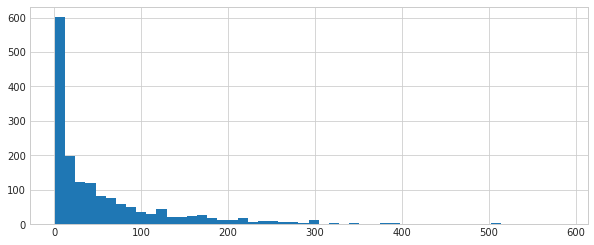

In [10]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins = 50);

**It looks like the our ratings are grouped around the 0-1 area.**
***
**Looking at the count of ratings**

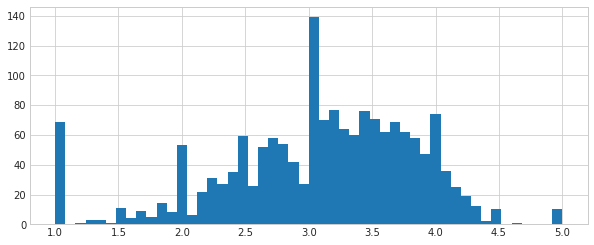

In [11]:
plt.figure(figsize=(10,4))
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins =50);

**Noticeable peaks at the whole numbers 1,2,3,4,5. Also, there is a noticeable clustering around 3.5. There also appear to be a number of bad movies.**

***
**Next, plotting the average rating to the number of ratings**

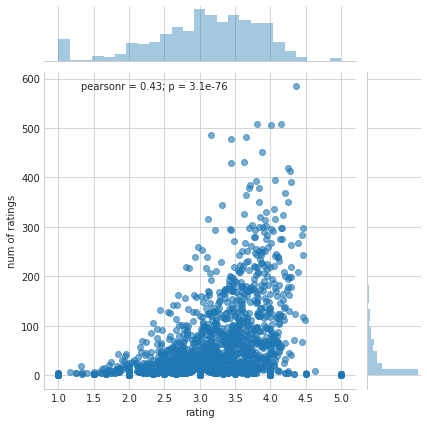

In [12]:
plt.figure(figsize=(10,4))
sns.jointplot(x='rating', y = 'num of ratings', data = ratings, alpha=0.6);

**The above plot illustrates a correlation between a higher number of ratings and higher ratings. Makes sense, the better the movie, more people watcching and more people reviewing. **
***
## Digging Deeper
**Using a pivot table tp build a matix with the movie titles on one axis and the reviewers on the other. Each cell will consist of the rating a reviewer gave that movie.**

In [13]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** A lot of Nan (missing values). Which is to be expected because reviewers probably did not watch and rate every single movie.**
***

**Looking at most rated movies**

In [14]:
ratings.sort_values('num of ratings', ascending =False).head(15)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


**Choosing 2 movies and getting the user ratings for those films:**


**Star Wars (a sci-fi adventure film)**

**Fargo (a Dark-Comedy/Drama)**

In [15]:
starwars_user_ratings = moviemat['Star Wars (1977)']
fargo_user_ratings = moviemat['Fargo (1996)']

In [16]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

**Using pandas' [corrwith](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corrwith.html) to correlate the reviews between Star Wars and Fargo. **

In [17]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [18]:
similar_to_fargo = moviemat.corrwith(fargo_user_ratings)

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


## Star Wars
**Removing null values and formatting to DataFrame.**

In [19]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlation'])
corr_starwars.dropna(inplace = True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


**The above DataFrame tells how correlated the review of the listed movie is to Star Wars.**

**However, the DataFrame will likely have highly correlated movies that do not make sense, as shown below**

In [20]:
corr_starwars.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0


**So, now we can see that there are a number of moview are perfectly correlated to Star Wars. This could be that above films were the only other film the view reviewed, plus Star Wars.**

**To get a better correlation we need to filter. We can do that by setting the threshhold of views.**

In [21]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])

In [22]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [23]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


**This is a much better representation of correlated films with Star Wars. For example in positions 2 and 3 we have The Empire Strikes Back and Return of the Jedi. Position 4 makes sense because of the Raiders of the Lost Ark's similarity to Star Wars. At Austin Powers there is a big drop in correlation. Although Austin Powers was a popiular movie which is likely why it is listed. **

## Fargo
**Removing null values and formatting to DataFrame.**

In [25]:
corr_fargo = pd.DataFrame(similar_to_fargo, columns = ['Correlation'])
corr_fargo.dropna(inplace = True)
corr_fargo.head()

,Correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [34]:
corr_fargo.sort_values('Correlation', ascending = False).head(2)

,Correlation,num of ratings
title,,
Open Season (1996),1.0,2
Maya Lin: A Strong Clear Vision (1994),1.0,4


In [27]:
corr_fargo = corr_fargo.join(ratings['num of ratings'])

In [29]:
corr_fargo.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


In [32]:
corr_fargo[corr_fargo['num of ratings']>75].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Fargo (1996),1.000000,508
To Die For (1995),0.551740,87
Bullets Over Broadway (1994),0.491990,86
Dolores Claiborne (1994),0.451390,79
Eat Drink Man Woman (1994),0.389068,80


**To get some better correlated the filter was adjusted Fargo's filter down to 75 reviews from 100 (used for Star Wars). This gave better recommendations. The films 'To Die For' and ' Bullets Over Broadway' are both drama/comedy films in the same style as Fargo. **

## Conclusion
**The recommender system is an incredibly useful for the analysis of data and identification of correlations in large bodies of data. The results are rather uncanny.**